### 다운샘플링(분기별, 주별)해서 축약해서 보는 방법 배우기 

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# 다운샘플링(분기별, 주별)해서 축약해서 보는 방법 배우기 
df = pd.read_excel('ss_ex_1.xlsx', parse_dates=['일자']) #일자가 문자열인데 parse_Dates로 datetime으로 바꿔준다
#df.info()
df=df.sort_values('일자')
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
126,2021-02-15,84200,2600,3.19,83800,84500,83300,23529706,1978336504100,502655690710000,5969782550
125,2021-02-16,84900,700,0.83,84500,86000,84200,20483100,1740792201903,506834538495000,5969782550
124,2021-02-17,83200,-1700,-2.00,83900,84200,83000,18307735,1526409421172,496685908160000,5969782550
123,2021-02-18,82100,-1100,-1.32,83200,83600,82100,21327683,1762033944231,490119147355000,5969782550
122,2021-02-19,82600,500,0.61,82300,82800,81000,25880879,2121275310450,493104038630000,5969782550
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550
3,2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2,2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
1,2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550


In [26]:
#df['일자'].dt.quarter # quarter를 사용하면 몇 분기인지 나눠준다

#  월별 집계값 보는법
df2 = df[['일자','시가','저가','고가','종가']].copy() # 데이터 가져와서 복사~ 왜냐 혹시나 바뀔 수도 있으니
df2['year'] = df2['일자'].dt.year
df2['month'] = df2['일자'].dt.month


a = df2.groupby(['year','month'])
a.get_group((2021,2))

,일자,시가,저가,고가,종가,year,month
126,2021-02-15,83800,83300,84500,84200,2021,2
125,2021-02-16,84500,84200,86000,84900,2021,2
124,2021-02-17,83900,83000,84200,83200,2021,2
123,2021-02-18,83200,82100,83600,82100,2021,2
122,2021-02-19,82300,81000,82800,82600,2021,2
121,2021-02-22,83800,82200,84200,82200,2021,2
120,2021-02-23,81200,81100,82900,82000,2021,2
119,2021-02-24,81800,81300,83600,82000,2021,2
118,2021-02-25,84000,83000,85400,85300,2021,2
117,2021-02-26,82800,82000,83400,82500,2021,2


In [30]:
# 월별 보고싶은 집계값
how = {
    "시가":'first',
    "저가":'min',
    "고가":'max',
    "종가" : 'last',
    
}

a.agg(how)

시가     저가     고가     종가
year month                            
2021 2      83800  81000  86000  82500
     3      85100  80600  85300  81400
     4      82500  81500  86200  81500
     5      81000  78400  83500  80500
     6      80500  79600  83000  80700
     7      80500  78100  81300  78500
     8      79200  74100  83300  74400

In [32]:
df.groupby(pd.Grouper(key = '일자',freq = 'm')).agg(how) # 월별로 보고싶으면 freq = 'm'

,시가,저가,고가,종가
일자,,,,
2021-02-28,83800,81000,86000,82500
2021-03-31,85100,80600,85300,81400
2021-04-30,82500,81500,86200,81500
2021-05-31,81000,78400,83500,80500
2021-06-30,80500,79600,83000,80700
2021-07-31,80500,78100,81300,78500
2021-08-31,79200,74100,83300,74400


In [34]:
df.groupby(pd.Grouper(key = '일자',freq = 'w')).agg(how) # 주별로 보고싶으면 freq = 'w' , 일별로 보고싶으면 freq = 'd'

,시가,저가,고가,종가
일자,,,,
2021-02-21,83800,81000,86000,82600
2021-02-28,83800,81100,85400,82500
2021-03-07,85100,81100,85300,82100
2021-03-14,82900,80600,83500,82800
2021-03-21,82800,81800,83800,81900
2021-03-28,82000,80700,82900,81500
2021-04-04,81700,81000,85200,84800
2021-04-11,85800,83400,86200,83600
2021-04-18,84100,82800,84700,83900


In [36]:
df.groupby(pd.Grouper(key = '일자',freq = '3m')).agg(how) # 3개월 단위로 보고싶으면 freq = '3m'

,시가,저가,고가,종가
일자,,,,
2021-02-28,83800,81000,86000,82500
2021-05-31,85100,78400,86200,80500
2021-08-31,80500,74100,83300,74400


In [38]:
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
126,2021-02-15,84200,2600,3.19,83800,84500,83300,23529706,1978336504100,502655690710000,5969782550
125,2021-02-16,84900,700,0.83,84500,86000,84200,20483100,1740792201903,506834538495000,5969782550
124,2021-02-17,83200,-1700,-2.00,83900,84200,83000,18307735,1526409421172,496685908160000,5969782550
123,2021-02-18,82100,-1100,-1.32,83200,83600,82100,21327683,1762033944231,490119147355000,5969782550
122,2021-02-19,82600,500,0.61,82300,82800,81000,25880879,2121275310450,493104038630000,5969782550
...,...,...,...,...,...,...,...,...,...,...,...
4,2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550
3,2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2,2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550
1,2021-08-12,77000,-1500,-1.91,77100,78200,76900,42365223,3276635421700,459673256350000,5969782550


In [40]:
# 컬럼 시피트
df=df.set_index('일자')

In [42]:
df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021-02-15,84200,2600,3.19,83800,84500,83300,23529706,1978336504100,502655690710000,5969782550
2021-02-16,84900,700,0.83,84500,86000,84200,20483100,1740792201903,506834538495000,5969782550
2021-02-17,83200,-1700,-2.00,83900,84200,83000,18307735,1526409421172,496685908160000,5969782550
2021-02-18,82100,-1100,-1.32,83200,83600,82100,21327683,1762033944231,490119147355000,5969782550
2021-02-19,82600,500,0.61,82300,82800,81000,25880879,2121275310450,493104038630000,5969782550
...,...,...,...,...,...,...,...,...,...,...
2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550
2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550


In [46]:
df['전일거래량']=df['거래량'].shift(1)
df[['거래량','전일거래량']]

,거래량,전일거래량
일자,,
2021-02-15,23529706,NaN
2021-02-16,20483100,23529706.0
2021-02-17,18307735,20483100.0
2021-02-18,21327683,18307735.0
2021-02-19,25880879,21327683.0
...,...,...
2021-08-09,15522581,13342623.0
2021-08-10,20362639,15522581.0
2021-08-11,30241137,20362639.0


In [48]:
# 거래량이 증가한 날은 총 몇일일까?
cond = df['거래량'] > df['전일거래량']

print(f"상승일 : {len(df[cond])}")
print(f"영업일 : {len(df)}")

상승일 : 66
영업일 : 127


In [54]:
# 간단한 모멘텀 전략 : 자산이 오르는 추세에 있으면 그 추세를 유지하려는 경향이 있다.
# 과거 6일 전의 종가 대비 당일 종가가 3% 이상 높다면 상승장으로 판단해서 참여(산다)

a=df['종가'] / df['종가'].shift(6)

cond = a>=1.03 # 3% 오른거임
len(df[cond]) # 12번의 시장 참여 기회가 있었다.


12

In [66]:
cond

일자
2021-02-15    False
2021-02-16    False
2021-02-17    False
2021-02-18    False
2021-02-19    False
              ...  
2021-08-09     True
2021-08-10    False
2021-08-11    False
2021-08-12    False
2021-08-13    False
Name: 종가, Length: 127, dtype: bool

In [64]:
# 시그널이 있던 다음날 시가에 사서 종가에 판다면 수익이 얼마인지
cond2 = cond.shift(1).fillna(False)

s = df.loc[cond2,'종가']/df.loc[cond2,'시가']
s.cumprod()[-1] # 약 9%의 손실이 있었다.

0.9137589546178475

In [62]:
cond2

일자
2021-02-15    False
2021-02-16    False
2021-02-17    False
2021-02-18    False
2021-02-19    False
              ...  
2021-08-09     True
2021-08-10     True
2021-08-11    False
2021-08-12    False
2021-08-13    False
Name: 종가, Length: 127, dtype: bool

#### 연습

In [77]:
df = pd.read_csv('CJ씨푸드.csv' ,parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Volume,Change
0,2000-06-26,2136,2136,1956,1955,772800,NaN
1,2000-06-27,1996,1996,1896,1955,42000,0.000000
2,2000-06-28,2036,2036,1936,1975,11400,0.010230
3,2000-06-29,1996,1996,1956,1995,133500,0.010127
4,2000-06-30,2195,2195,1936,1995,88300,0.000000
...,...,...,...,...,...,...,...
5995,2024-10-11,3300,3330,3225,3230,228077,-0.021212
5996,2024-10-14,3240,3270,3150,3245,157354,0.004644
5997,2024-10-15,3260,3405,3235,3315,583924,0.021572
5998,2024-10-16,3400,3735,3245,3250,3775622,-0.019608


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 2000-06-26 to 2024-10-17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


In [89]:
df=df.set_index('Date')


KeyError: "None of ['Date'] are in the columns"

In [91]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-06-26,2136,2136,1956,1955,772800,NaN
2000-06-27,1996,1996,1896,1955,42000,0.000000
2000-06-28,2036,2036,1936,1975,11400,0.010230
2000-06-29,1996,1996,1956,1995,133500,0.010127
2000-06-30,2195,2195,1936,1995,88300,0.000000
...,...,...,...,...,...,...
2024-10-11,3300,3330,3225,3230,228077,-0.021212
2024-10-14,3240,3270,3150,3245,157354,0.004644
2024-10-15,3260,3405,3235,3315,583924,0.021572


#### 풀이

In [109]:
# Change 컬럼을 6일 기준으로 누적 곱 계산 (6일마다 누적)
a_change =  (df['Change'] + 1).cumprod().shift(1)/(df['Change'] + 1).cumprod().shift(6) # ? GPT가 만든 식 살짝 이해 안감 나누기하는 부분에서

# 3% 이상 누적 변동이 발생한 경우
cond = a_change >= 1.03

# 3% 이상 변동한 기회 수 계산
len(df[cond]) # 3% 이상 변동한 기회 수 계산

1459

In [99]:
# 시그널이 있던 다음날 시가에 사서 종가에 판다면 수익이 얼마인지
cond2 = cond.shift(1).fillna(False)

s = df.loc[cond2,'Close']/df.loc[cond2,'Open']
s.cumprod()[-1] # 약 9%의 손실이 있었다.

0.6375467872444421

#### 강사님 풀이

In [103]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-06-26,2136,2136,1956,1955,772800,NaN
2000-06-27,1996,1996,1896,1955,42000,0.000000
2000-06-28,2036,2036,1936,1975,11400,0.010230
2000-06-29,1996,1996,1956,1995,133500,0.010127
2000-06-30,2195,2195,1936,1995,88300,0.000000
...,...,...,...,...,...,...
2024-10-11,3300,3330,3225,3230,228077,-0.021212
2024-10-14,3240,3270,3150,3245,157354,0.004644
2024-10-15,3260,3405,3235,3315,583924,0.021572


In [111]:
a=df['Close']/df['Close'].shift(6)
cond = a >= 1.03
len(df[cond])

1546

In [113]:
cond2 = cond.shift(1).fillna(False)

s = df.loc[cond2,"Close"]/df.loc[cond2,'Open']
s.cumprod()

Date
2000-07-05    0.960983
2000-07-07    0.960520
2000-07-10    0.950896
2000-07-11    0.931934
2000-07-19    1.045228
                ...   
2024-09-24    0.000030
2024-09-25    0.000029
2024-09-27    0.000029
2024-09-30    0.000029
2024-10-02    0.000029
Length: 1546, dtype: float64

### 이동 평균선 투자 전략

- 특정 구간의 주가를 산술 평균에서 여러 구간의 평균값을 연결한 선

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



df = pd.read_excel('ss_ex_1.xlsx', parse_dates=['일자']) #일자가 문자열인데 parse_Dates로 datetime으로 바꿔준다
#df.info()
df=df.sort_values('일자')
df = df.set_index('일자')
df

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
일자,,,,,,,,,,
2021-02-15,84200,2600,3.19,83800,84500,83300,23529706,1978336504100,502655690710000,5969782550
2021-02-16,84900,700,0.83,84500,86000,84200,20483100,1740792201903,506834538495000,5969782550
2021-02-17,83200,-1700,-2.00,83900,84200,83000,18307735,1526409421172,496685908160000,5969782550
2021-02-18,82100,-1100,-1.32,83200,83600,82100,21327683,1762033944231,490119147355000,5969782550
2021-02-19,82600,500,0.61,82300,82800,81000,25880879,2121275310450,493104038630000,5969782550
...,...,...,...,...,...,...,...,...,...,...
2021-08-09,81500,0,0.00,81500,82300,80900,15522581,1267668377900,486537277825000,5969782550
2021-08-10,80200,-1300,-1.60,82300,82400,80100,20362639,1643107615500,478776560510000,5969782550
2021-08-11,78500,-1700,-2.12,79600,79800,78500,30241137,2389977254924,468627930175000,5969782550


In [3]:
df2 = df[['종가']]
df2

,종가
일자,
2021-02-15,84200
2021-02-16,84900
2021-02-17,83200
2021-02-18,82100
2021-02-19,82600
...,...
2021-08-09,81500
2021-08-10,80200
2021-08-11,78500


In [4]:
df2["종가D-1"]=df2['종가'].shift(1)
df2["종가D-2"]=df2['종가'].shift(2)

df2["MA3"] = (df2['종가'] + df2['종가D-1'] + df2['종가D-2']) /3
df2['rolling3'] = df2['종가'].rolling(window =3).mean()
df2

,종가,종가D-1,종가D-2,MA3,rolling3
일자,,,,,
2021-02-15,84200,NaN,NaN,NaN,NaN
2021-02-16,84900,84200.0,NaN,NaN,NaN
2021-02-17,83200,84900.0,84200.0,84100.000000,84100.000000
2021-02-18,82100,83200.0,84900.0,83400.000000,83400.000000
2021-02-19,82600,82100.0,83200.0,82633.333333,82633.333333
...,...,...,...,...,...
2021-08-09,81500,81500.0,82100.0,81700.000000,81700.000000
2021-08-10,80200,81500.0,81500.0,81066.666667,81066.666667
2021-08-11,78500,80200.0,81500.0,80066.666667,80066.666667


In [5]:
# 시가가 5일 이동평균선을 돌파하면 상승 추세라고 판단하고 참여

In [6]:
df = pd.read_excel('ss_ex_1.xlsx', parse_dates=['일자']) #일자가 문자열인데 parse_Dates로 datetime으로 바꿔준다
#df.info()
df=df.sort_values('일자')
df = df.set_index('일자')

df['MA5'] = df['종가'].rolling(window =5).mean()

cond = df['MA5']<df['종가']

# print(len(df[cond])) # 51일 정도 시장 참여 기회가 있었다.
# print(len(df))

# 5일 > 20일 > 60일 >120일
cond2 = cond.shift(1).fillna(False)
s= df.loc[cond2,'종가']/df.loc[cond2,'시가']
s.cumprod()

일자
2021-02-26    0.996377
2021-03-03    1.002343
2021-03-04    0.999916
2021-03-12    0.996306
2021-03-15    0.984274
2021-03-16    0.991458
2021-03-17    0.985471
2021-03-19    0.983070
2021-03-30    0.990299
2021-03-31    0.978281
2021-04-02    0.987598
2021-04-05    0.982993
2021-04-06    0.980713
2021-04-07    0.975018
2021-04-08    0.963640
2021-04-15    0.968246
2021-04-16    0.959100
2021-04-19    0.953378
2021-04-21    0.945366
2021-04-27    0.941958
2021-04-28    0.929504
2021-05-06    0.936330
2021-05-07    0.937475
2021-05-11    0.922702
2021-05-20    0.923864
2021-05-21    0.923864
2021-05-24    0.919251
2021-05-26    0.912391
2021-05-31    0.914663
2021-06-01    0.915799
2021-06-02    0.920356
2021-06-03    0.937336
2021-06-04    0.931669
2021-06-07    0.922657
2021-06-08    0.918172
2021-06-17    0.915908
2021-06-25    0.917032
2021-06-28    0.919277
2021-06-29    0.909175
2021-07-07    0.904696
2021-07-08    0.891310
2021-07-16    0.887972
2021-07-23    0.883515
2021-07-

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('CJ씨푸드.csv', parse_dates=['Date'])
df = df.set_index("Date")

df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA60'] = df['Close'].rolling(window=60).mean()
df['MA120'] = df['Close'].rolling(window=120).mean()
df = df.dropna()
df

,Open,High,Low,Close,Volume,Change,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2000-12-18,2495,2994,2495,2734,348000,-0.007262,2845.6,2471.40,2865.900000,2885.183333
2000-12-19,2575,2714,2415,2415,133100,-0.116679,2710.0,2462.45,2846.283333,2889.016667
2000-12-20,2395,2395,2195,2195,388000,-0.091097,2622.2,2446.50,2821.000000,2891.016667
2000-12-21,2295,2295,2096,2295,197500,0.045558,2478.6,2441.50,2799.716667,2893.683333
2000-12-22,2195,2295,2156,2255,222100,-0.017429,2378.8,2431.55,2775.766667,2895.850000
...,...,...,...,...,...,...,...,...,...,...
2024-10-11,3300,3330,3225,3230,228077,-0.021212,3297.0,3336.00,3686.750000,3920.666667
2024-10-14,3240,3270,3150,3245,157354,0.004644,3282.0,3337.25,3664.750000,3924.791667
2024-10-15,3260,3405,3235,3315,583924,0.021572,3271.0,3338.25,3644.833333,3929.375000


In [8]:
df2 = df[df.index.year ==2024]
df2

,Open,High,Low,Close,Volume,Change,MA5,MA20,MA60,MA120
Date,,,,,,,,,,
2024-01-02,2940,2960,2910,2920,246884,-0.006803,2997.0,2949.25,2802.250000,2991.875000
2024-01-03,2920,2930,2870,2870,203128,-0.017123,2972.0,2949.25,2804.833333,2987.958333
2024-01-04,2850,2890,2820,2860,247755,-0.003484,2932.0,2946.25,2806.666667,2984.000000
2024-01-05,2855,2880,2840,2840,94900,-0.006993,2886.0,2943.75,2809.000000,2980.583333
2024-01-08,2830,2935,2830,2885,134981,0.015845,2875.0,2943.25,2811.916667,2977.083333
...,...,...,...,...,...,...,...,...,...,...
2024-10-11,3300,3330,3225,3230,228077,-0.021212,3297.0,3336.00,3686.750000,3920.666667
2024-10-14,3240,3270,3150,3245,157354,0.004644,3282.0,3337.25,3664.750000,3924.791667
2024-10-15,3260,3405,3235,3315,583924,0.021572,3271.0,3338.25,3644.833333,3929.375000


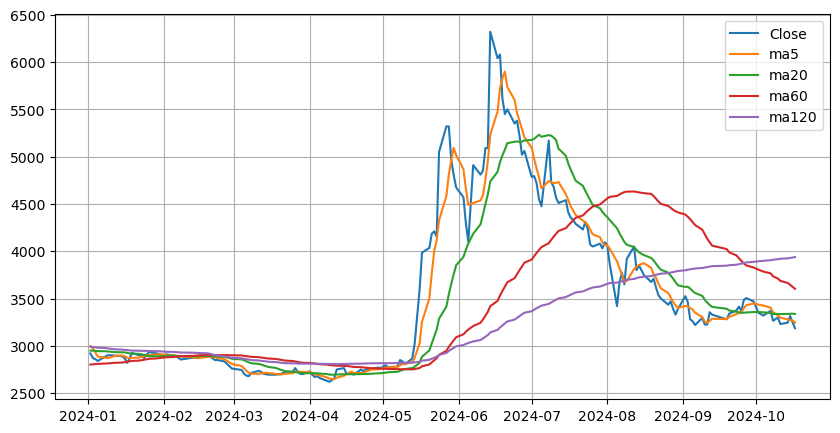

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df2['Close'])
plt.plot(df2['MA5'])
plt.plot(df2['MA20'])
plt.plot(df2['MA60'])
plt.plot(df2['MA120'])
plt.legend(['Close','ma5','ma20','ma60','ma120'])
plt.grid()
plt.show()

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import os


df = pd.read_csv('CJ씨푸드.csv', parse_dates=['Date'])
df = df.set_index("Date")



for i in os.listdir("krx_data"):
    try:
        df = pd.read_csv("krx_data/" + i, parse_dates=['Date'])
        df = df.set_index("Date")
    
        df['MA5'] = df['Close'].rolling(window = 5).mean()
        df['MA20'] = df['Close'].rolling(window = 20).mean()
        df['MA60'] = df['Close'].rolling(window = 60).mean()
        df['MA120'] = df['Close'].rolling(window = 120).mean()
        df = df.dropna()
        df2 = df[df.index.year == 2024]
        a = df2.iloc[-1]
        if a['MA120'] < a['MA60'] < a['MA20'] < a['MA5'] < a['Close']:
            plt.figure(figsize = (10, 5))
            plt.title(i)
            plt.plot(df2['Close'])
            plt.plot(df2['MA5'])
            plt.plot(df2['MA20'])
            plt.plot(df2['MA60'])
            plt.plot(df2['MA120'])
            plt.legend(['Close', 'ma5', 'ma20', 'ma60', 'ma120'])
            plt.grid()
            plt.savefig(f"MA/{i}.png")
            plt.close()
    except:
        continue


In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



df = pd.read_excel('ss_ex_1.xlsx', parse_dates=['일자']) #일자가 문자열인데 parse_Dates로 datetime으로 바꿔준다
#df.info()
df=df.sort_values('일자')
df = df.set_index('일자')


df2 = df[['시가','저가','고가','종가','거래량']]
df2

,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-15,83800,83300,84500,84200,23529706
2021-02-16,84500,84200,86000,84900,20483100
2021-02-17,83900,83000,84200,83200,18307735
2021-02-18,83200,82100,83600,82100,21327683
2021-02-19,82300,81000,82800,82600,25880879
...,...,...,...,...,...
2021-08-09,81500,80900,82300,81500,15522581
2021-08-10,82300,80100,82400,80200,20362639
2021-08-11,79600,78500,79800,78500,30241137


In [13]:
# df2.resample('M').first() # 월단위로 그룹화
df2.resample('MS').last() 

,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-01,82800,82000,83400,82500,38520800
2021-03-01,82400,81400,82700,81400,17240518
2021-04-01,81900,81500,82100,81500,18673197
2021-05-01,80300,79600,80600,80500,13321324
2021-06-01,81100,80700,81400,80700,13288643
2021-07-01,78900,78500,78900,78500,13823411
2021-08-01,75800,74100,76000,74400,61270643


In [15]:
# 월별 보고싶은 집계값
how = {
    "시가":'first',
    "저가":'min',
    "고가":'max',
    "종가" : 'last',
    '거래량' : 'sum'
    
}

df2.resample('MS').agg(how)

,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-01,83800,81000,86000,82500,255020740
2021-03-01,85100,80600,85300,81400,387612356
2021-04-01,82500,81500,86200,81500,372938171
2021-05-01,81000,78400,83500,80500,352211074
2021-06-01,80500,79600,83000,80700,333099465
2021-07-01,80500,78100,81300,78500,275886253
2021-08-01,79200,74100,83300,74400,263311167


In [17]:
df2.resample('3D').agg(how)

,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-15,83800.0,83000.0,86000.0,83200.0,62320541
2021-02-18,83200.0,81000.0,83600.0,82600.0,47208562
2021-02-21,83800.0,81100.0,84200.0,82000.0,46007200
2021-02-24,81800.0,81300.0,85400.0,82500.0,99484437
2021-02-27,NaN,NaN,NaN,NaN,0
2021-03-02,85100.0,82200.0,85300.0,82400.0,77728643
2021-03-05,81100.0,81100.0,82600.0,82100.0,20508971
2021-03-08,82900.0,80600.0,83000.0,80900.0,63100442
2021-03-11,81000.0,81000.0,83500.0,82800.0,37348870


In [27]:
df2.resample('12H').agg(how).ffill() # 12시간 단위니깐 없는 값이 있을 수도 있으니 앞에 값으로 채운다.


,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-15 00:00:00,83800.0,83300.0,84500.0,84200.0,23529706
2021-02-15 12:00:00,83800.0,83300.0,84500.0,84200.0,0
2021-02-16 00:00:00,84500.0,84200.0,86000.0,84900.0,20483100
2021-02-16 12:00:00,84500.0,84200.0,86000.0,84900.0,0
2021-02-17 00:00:00,83900.0,83000.0,84200.0,83200.0,18307735
...,...,...,...,...,...
2021-08-11 00:00:00,79600.0,78500.0,79800.0,78500.0,30241137
2021-08-11 12:00:00,79600.0,78500.0,79800.0,78500.0,0
2021-08-12 00:00:00,77100.0,76900.0,78200.0,77000.0,42365223


In [29]:
import numpy as np
temp = df2.resample('12H').agg(how)
idx=temp.isna().any(axis=1)
temp.loc[idx,'거래량']=np.nan
temp2 = temp.ffill()
temp2

,시가,저가,고가,종가,거래량
일자,,,,,
2021-02-15 00:00:00,83800.0,83300.0,84500.0,84200.0,23529706.0
2021-02-15 12:00:00,83800.0,83300.0,84500.0,84200.0,23529706.0
2021-02-16 00:00:00,84500.0,84200.0,86000.0,84900.0,20483100.0
2021-02-16 12:00:00,84500.0,84200.0,86000.0,84900.0,20483100.0
2021-02-17 00:00:00,83900.0,83000.0,84200.0,83200.0,18307735.0
...,...,...,...,...,...
2021-08-11 00:00:00,79600.0,78500.0,79800.0,78500.0,30241137.0
2021-08-11 12:00:00,79600.0,78500.0,79800.0,78500.0,30241137.0
2021-08-12 00:00:00,77100.0,76900.0,78200.0,77000.0,42365223.0


In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



df = pd.read_excel('ss_ex_1.xlsx', parse_dates=['일자']) #일자가 문자열인데 parse_Dates로 datetime으로 바꿔준다
#df.info()
df=df.sort_values('일자')
df = df.set_index('일자')

df2 = df[['종가','시가']]

df_quarter = df2['시가'].resample('q').first().to_frame()
df_quarter['quarter'] = df_quarter.index.quarter

df2['quarter']  = df2.index.quarter
df2_daily = df2[['종가','quarter']].reset_index()
df2_daily

,일자,종가,quarter
0,2021-02-15,84200,1
1,2021-02-16,84900,1
2,2021-02-17,83200,1
3,2021-02-18,82100,1
4,2021-02-19,82600,1
...,...,...,...
122,2021-08-09,81500,3
123,2021-08-10,80200,3
124,2021-08-11,78500,3
125,2021-08-12,77000,3


In [13]:
# 분기별로 일자 수익률 계산
r = df2_daily.merge(df_quarter, on = 'quarter')
r['수익률'] = r['종가']/r['시가']
r.set_index(['quarter','일자'])

종가     시가       수익률
quarter 일자                                
1       2021-02-15  84200  83800  1.004773
        2021-02-16  84900  83800  1.013126
        2021-02-17  83200  83800  0.992840
        2021-02-18  82100  83800  0.979714
        2021-02-19  82600  83800  0.985680
...                   ...    ...       ...
3       2021-08-09  81500  80500  1.012422
        2021-08-10  80200  80500  0.996273
        2021-08-11  78500  80500  0.975155
        2021-08-12  77000  80500  0.956522
        2021-08-13  74400  80500  0.924224

[127 rows x 3 columns]

In [16]:
!pip install finance-datareader

   ---------------------------------------- 0.0/89.3 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/89.3 kB ? eta -:--:--
   --------------------------- ------------ 61.4/89.3 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 89.3/89.3 kB 1.3 MB/s eta 0:00:00


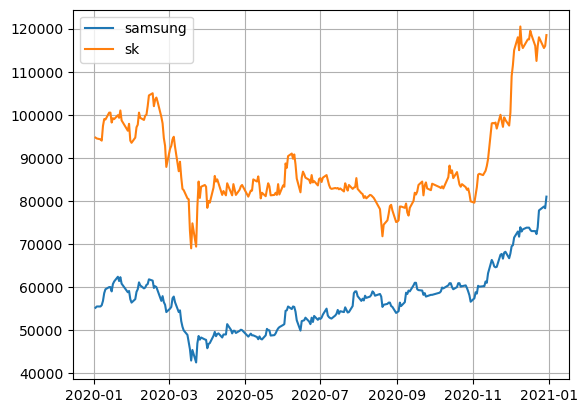

In [19]:
import FinanceDataReader as fdr

samsung = fdr.DataReader("005930",start = '2020-01-01',end='2020-12-31')
sk = fdr.DataReader("000660",start = '2020-01-01',end='2020-12-31')

plt.plot(samsung.index,samsung['Close'])
plt.plot(sk.index,sk['Close'])
plt.legend(['samsung','sk'])
plt.grid()
plt.show()

In [22]:
# 비교하기쉽게 만들기
samsung_index = samsung['Close'] / samsung['Close'][0]*100
sk_index = sk['Close'] / sk['Close'][0]*100

sk_index

Date
2020-01-02    100.000000
2020-01-03     99.788807
2020-01-06     99.577614
2020-01-07     99.260824
2020-01-08    102.851109
                 ...    
2020-12-23    122.492080
2020-12-24    124.604013
2020-12-28    121.964097
2020-12-29    122.492080
2020-12-30    125.131996
Name: Close, Length: 248, dtype: float64

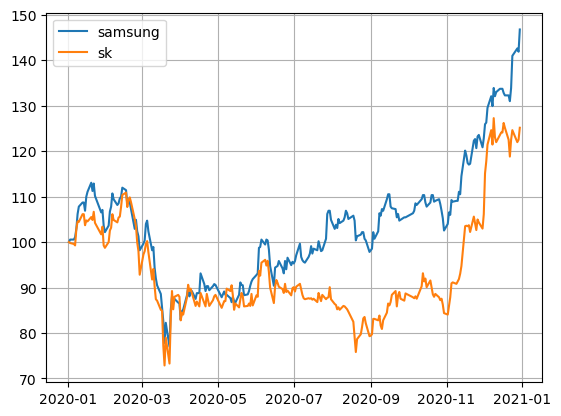

In [23]:
plt.plot(samsung.index,samsung_index)
plt.plot(sk.index,sk_index)
plt.legend(['samsung','sk'])
plt.grid()
plt.show()

#### 캔들차트 그리기

In [24]:
!pip install mplfinance

   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 75.0/75.0 kB 1.4 MB/s eta 0:00:00


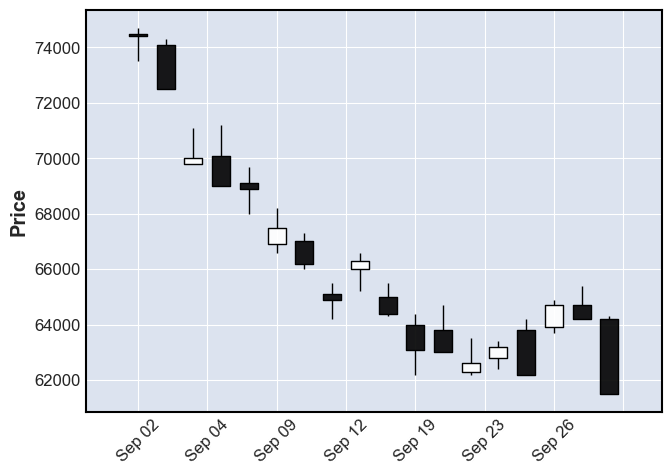

In [27]:
import mplfinance as mpf

samsung = fdr.DataReader('005930')

mpf.plot(data=samsung.loc['2024-09'],type = 'candle')

In [28]:
mpf.available_styles() # 캔들 스킨 확인

['binance',
 'binancedark',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'tradingview',
 'yahoo']

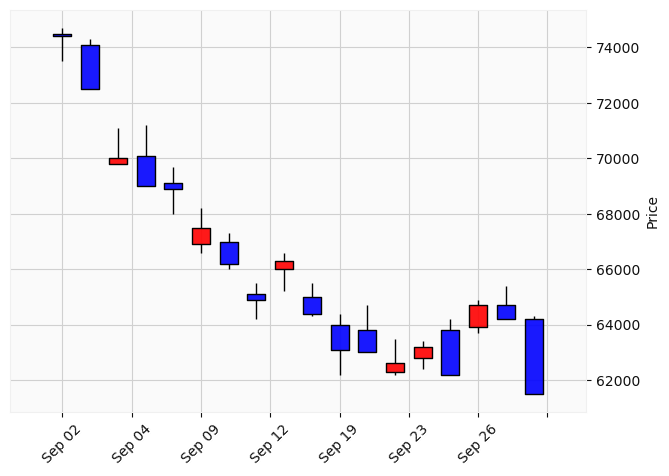

In [30]:
mc = mpf.make_marketcolors(
    up='r',
    down = 'b'
)

s = mpf.make_mpf_style(
    base_mpf_style ="yahoo", # 스킨만듬
    marketcolors = mc
)

mpf.plot(data = samsung.loc['2024-09'],type = 'candle',style = s)

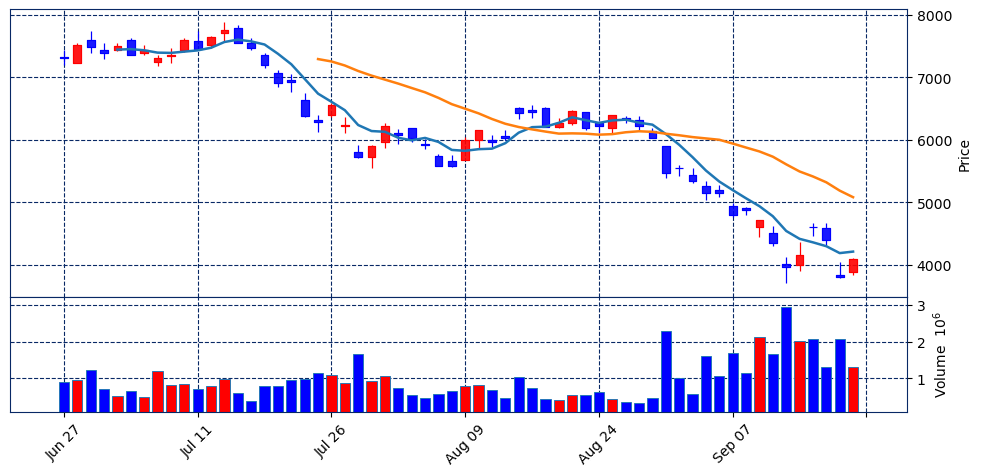

In [33]:
mc = mpf.make_marketcolors(
    up="r", 
    down="b", 
    edge="inherit",   # 캔들의 몸통색
    wick="inherit",   # 캔들의 머리/꼬리색
    volume="inherit"  # 거래량 색상
)

s = mpf.make_mpf_style(
    base_mpf_style="starsandstripes", 
    marketcolors=mc, 
    gridaxis='both',   # horizontal, vertical, both
    y_on_right=True    # False는 y축을 왼쪽에 표시
)

mpf.plot(
    data=samsung.iloc[:60], 
    type='candle', 
    style=s, 
    figratio=(13, 6),
    mav = (5,20), # 이동평균선 5일,20일치
    volume=True,      # volume
    scale_width_adjustment=dict(volume=0.8, candle=1)
)

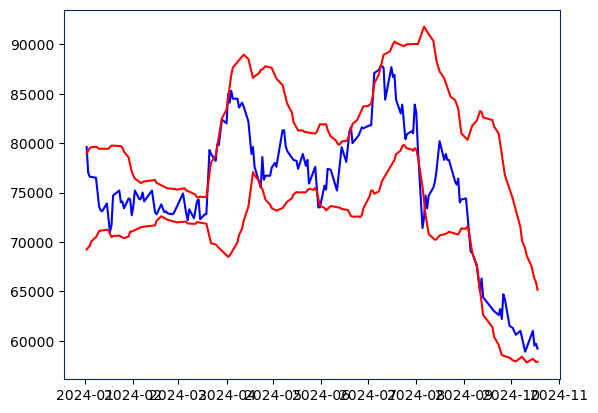

In [39]:
# 볼린저 밴드 // -표준편차 *2 < 값 < 값 + 표준편차 * 2


window = 20
std = 2

mean=samsung['Close'].rolling(window=20).mean()
std = samsung['Close'].rolling(window=20).std()

samsung['mean'] = mean
samsung['std'] = std

samsung['UB'] = samsung['mean']+ 2 * samsung['std'] # 신뢰구간으로 예를 들면 95퍼 윗구간
samsung['LB'] = samsung['mean'] -  2 * samsung['std']

samsung2 = samsung[samsung.index.year==2024]

plt.plot(samsung2['Close'],color = 'b')
# plt.plot(samsung2['mean'])
plt.plot(samsung2["UB"],color ='r')
plt.plot(samsung2["LB"],color ='r')
plt.grid()
plt.show()

#### 연습

- 현재 가격이 LB보다 아래에 있는 종목 추출하기!

In [40]:
import FinanceDataReader as fdr
import pandas as pd

# 모든 종목 코드 가져오기
all_stocks = fdr.StockListing('KOSPI')

# 현재 가격이 LB보다 낮은 종목을 저장할 리스트
low_below_lb_stocks = []

# 각 종목의 주가 데이터 수집
for code in all_stocks['Code']:
    try:
        # 각 종목의 주가 데이터 가져오기 (예: 2020-01-01 이후)
        stock_data = fdr.DataReader(code, '2020-01-01')
        
        # Bollinger Band 계산
        window = 20
        stock_data['mean'] = stock_data['Close'].rolling(window=window).mean()
        stock_data['std'] = stock_data['Close'].rolling(window=window).std()
        stock_data['UB'] = stock_data['mean'] + 2 * stock_data['std']  # 상한선
        stock_data['LB'] = stock_data['mean'] - 2 * stock_data['std']  # 하한선

        # 현재 가격 가져오기
        current_price = stock_data['Close'].iloc[-1]  # 가장 최근의 종가

        # 현재 가격이 LB보다 낮은지 확인
        if current_price < stock_data['LB'].iloc[-1]:
            low_below_lb_stocks.append((code, current_price, stock_data['LB'].iloc[-1]))
            print(f"{code}: 현재 가격 {current_price}이 LB {stock_data['LB'].iloc[-1]}보다 낮습니다.")

    except Exception as e:
        print(f"{code} 데이터 수집 실패: {e}")

# 결과 출력
if low_below_lb_stocks:
    print("\n현재 가격이 LB보다 낮은 종목:")
    for stock in low_below_lb_stocks:
        print(f"종목 코드: {stock[0]}, 현재 가격: {stock[1]}, LB: {stock[2]}")
else:
    print("현재 가격이 LB보다 낮은 종목이 없습니다.")


005490: 현재 가격 341500이 LB 342363.56401753보다 낮습니다.
006400: 현재 가격 328000이 LB 332838.06186075264보다 낮습니다.
009150: 현재 가격 121700이 LB 121822.27616813114보다 낮습니다.
047050: 현재 가격 51100이 LB 51893.572988472726보다 낮습니다.
251270: 현재 가격 56200이 LB 56949.94309467001보다 낮습니다.
112610: 현재 가격 58700이 LB 59325.491753528506보다 낮습니다.
000880: 현재 가격 27450이 LB 27495.51600135041보다 낮습니다.
020150: 현재 가격 37200이 LB 37286.79466499887보다 낮습니다.
457190: 현재 가격 44500이 LB 44879.06845537021보다 낮습니다.
011210: 현재 가격 47400이 LB 48515.65410341676보다 낮습니다.
280360: 현재 가격 132200이 LB 132567.02312991375보다 낮습니다.
073240: 현재 가격 4150이 LB 4153.972488979311보다 낮습니다.
005300: 현재 가격 120500이 LB 121312.19969102532보다 낮습니다.
353200: 현재 가격 17110이 LB 17242.81038202286보다 낮습니다.
181710: 현재 가격 15930이 LB 15966.479178957765보다 낮습니다.
002030: 현재 가격 248000이 LB 249364.91256915708보다 낮습니다.
018250: 현재 가격 16760이 LB 16804.88514676434보다 낮습니다.
003960: 현재 가격 44350이 LB 44845.91782529812보다 낮습니다.
017860: 현재 가격 69400이 LB 69546.89802173199보다 낮습니다.
453340: 현재 가격 11560이 LB 11606.549970721

KeyboardInterrupt: 

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt

# 종목 코드
code = '005490'

# 종목의 주가 데이터 가져오기 (2020-01-01부터)
stock_data = fdr.DataReader(code, '2020-01-01')

# Bollinger Band 계산
window = 20
stock_data['mean'] = stock_data['Close'].rolling(window=window).mean()
stock_data['std'] = stock_data['Close'].rolling(window=window).std()
stock_data['UB'] = stock_data['mean'] + 2 * stock_data['std']  # 상한선
stock_data['LB'] = stock_data['mean'] - 2 * stock_data['std']  # 하한선

# 최근 가격과 LB 확인
current_price = stock_data['Close'].iloc[-1]
lb_value = stock_data['LB'].iloc[-1]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='종가', color='blue')
plt.plot(stock_data['mean'], label='이동 평균', color='orange')
plt.plot(stock_data['UB'], label='상한선 (UB)', color='green', linestyle='--')
plt.plot(stock_data['LB'], label='하한선 (LB)', color='red', linestyle='--')

# 현재 가격 점 표시
plt.scatter(stock_data.index[-1], current_price, color='red', marker='o', label='현재 가격', s=100)

# 차트 제목 및 레전드 추가
plt.title(f"{code} 주가 및 Bollinger Band")
plt.xlabel("날짜")
plt.ylabel("가격")
plt.legend()
plt.grid()
plt.axhline(y=lb_value, color='red', linestyle=':', label='LB 값: {:.2f}'.format(lb_value))

# 차트 표시
plt.show()
